In [1]:
# Importing packages
import numpy as np  # for matrix and data manipulation
import pandas as pd  # for DataFrames
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for more plotitng
import statsmodels.api as sm  # for statistical modelling
import scikitplot as skplt  # for scikit-learn plotting

from sklearn.preprocessing import StandardScaler  # for preprocessing & scaling
from sklearn.preprocessing import PolynomialFeatures  # for polynomial features preprocessing
from sklearn.impute import SimpleImputer   # for missing values imputation
from sklearn.model_selection import train_test_split  # train-test splits
from sklearn.model_selection import StratifiedKFold  # K-fold resampling, stratified
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.calibration import CalibratedClassifierCV  # Hyperparameter tuning with calibration
from sklearn.calibration import calibration_curve  # calibration curve plotting
from sklearn.calibration import CalibrationDisplay  # calibration curve plotting
from sklearn.metrics import confusion_matrix  # performance metrics, confusion matrix
from sklearn.metrics import classification_report  # performance matrix classifiaction report
from sklearn.metrics import roc_auc_score  # Area Under Receiver Operating Characteristics
from sklearn.metrics import roc_curve  # ROC
from sklearn.metrics import RocCurveDisplay  # ROC plotting
from sklearn.metrics import accuracy_score  # performance metric accuracy (0/1) score
from sklearn.metrics import precision_score  # performance metric
from sklearn.linear_model import LogisticRegression  # Logistic regression modelling
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.ensemble import GradientBoostingClassifier  # GBM for classification
from sklearn.svm import SVC  # SVM for classification
from sklearn.utils import resample  # Resampling
from imblearn.over_sampling import SMOTE  # Synthetic upsampling

In [2]:
# Setting plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Jupyter magic command to show plots inline immediately
%matplotlib inline

In [4]:
# Setting seed
seed = 43
np.random.seed(seed)

In [5]:
# Loading the house price dataset
data_file_path = './'  # Set to the path of folder where you can find 'train_V2.csv' and 'score.csv'

# Training data
train_V2 = pd.read_csv(data_file_path + 'train_V2.csv')
score = pd.read_csv(data_file_path + 'score.csv')
print('Training set shape: {}' .format(train_V2.shape))
print('Score set shape: {}' .format(score.shape))

#dictionary = pd.read_csv(data_file_path + 'dictionary.csv')
#print('Dictionary set shape: {}' .format(score.shape))

Training set shape: (5000, 53)
Score set shape: (500, 50)


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(train_V2.columns.tolist())
for col in train_V2.columns.tolist():
    print(col)

['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic', 'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd', 'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit', 'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl', 'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size', 'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no', 'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use', 'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos', 'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg', 'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']
income_am
profit_last_am
profit_am
damage_am
damage_inc
crd_lim_rec
credit_use_ic
gluten_ic
lactose_ic
insurance_ic
spa_ic
empl_ic
cab_requests
married_cd
bar_no
sport_ic
neighbor_income
age
marketing_permit
urban_ic
dining_ic
president

In [7]:
# Setting 'Id' columns as index
train_V2.insert(0, 'Id', range(0, 0 + len(train_V2)))
if 'Id' in train_V2.columns:
    train_V2 = train_V2.set_index('Id')

In [8]:
train_V2.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


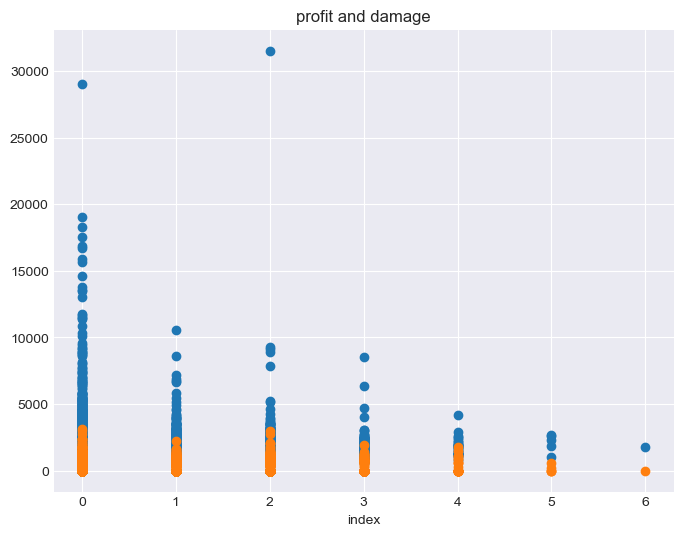

In [9]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x=train_V2['children_no'], y=train_V2['outcome_profit']);
plt.scatter(x=train_V2['children_no'], y=train_V2['outcome_damage_amount']);
plt.title('profit and damage');
plt.xlabel('index');

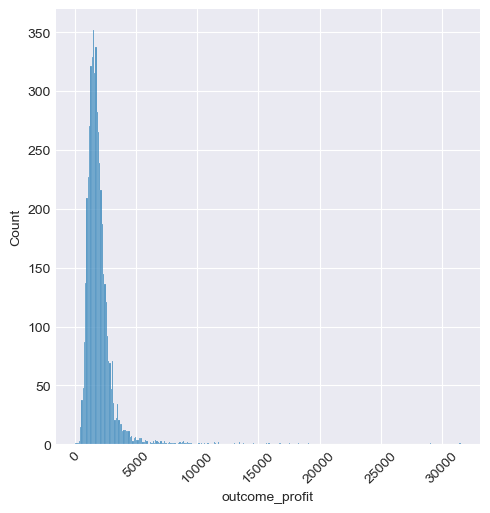

In [10]:
# Checking univariate distribution of the sales price
sns.displot(train_V2['outcome_profit']);  # With seaborn for a change
plt.xticks(rotation=45); # Rotating x labels

# plt alternative
#plt.hist(train_V2['outcome_profit']);

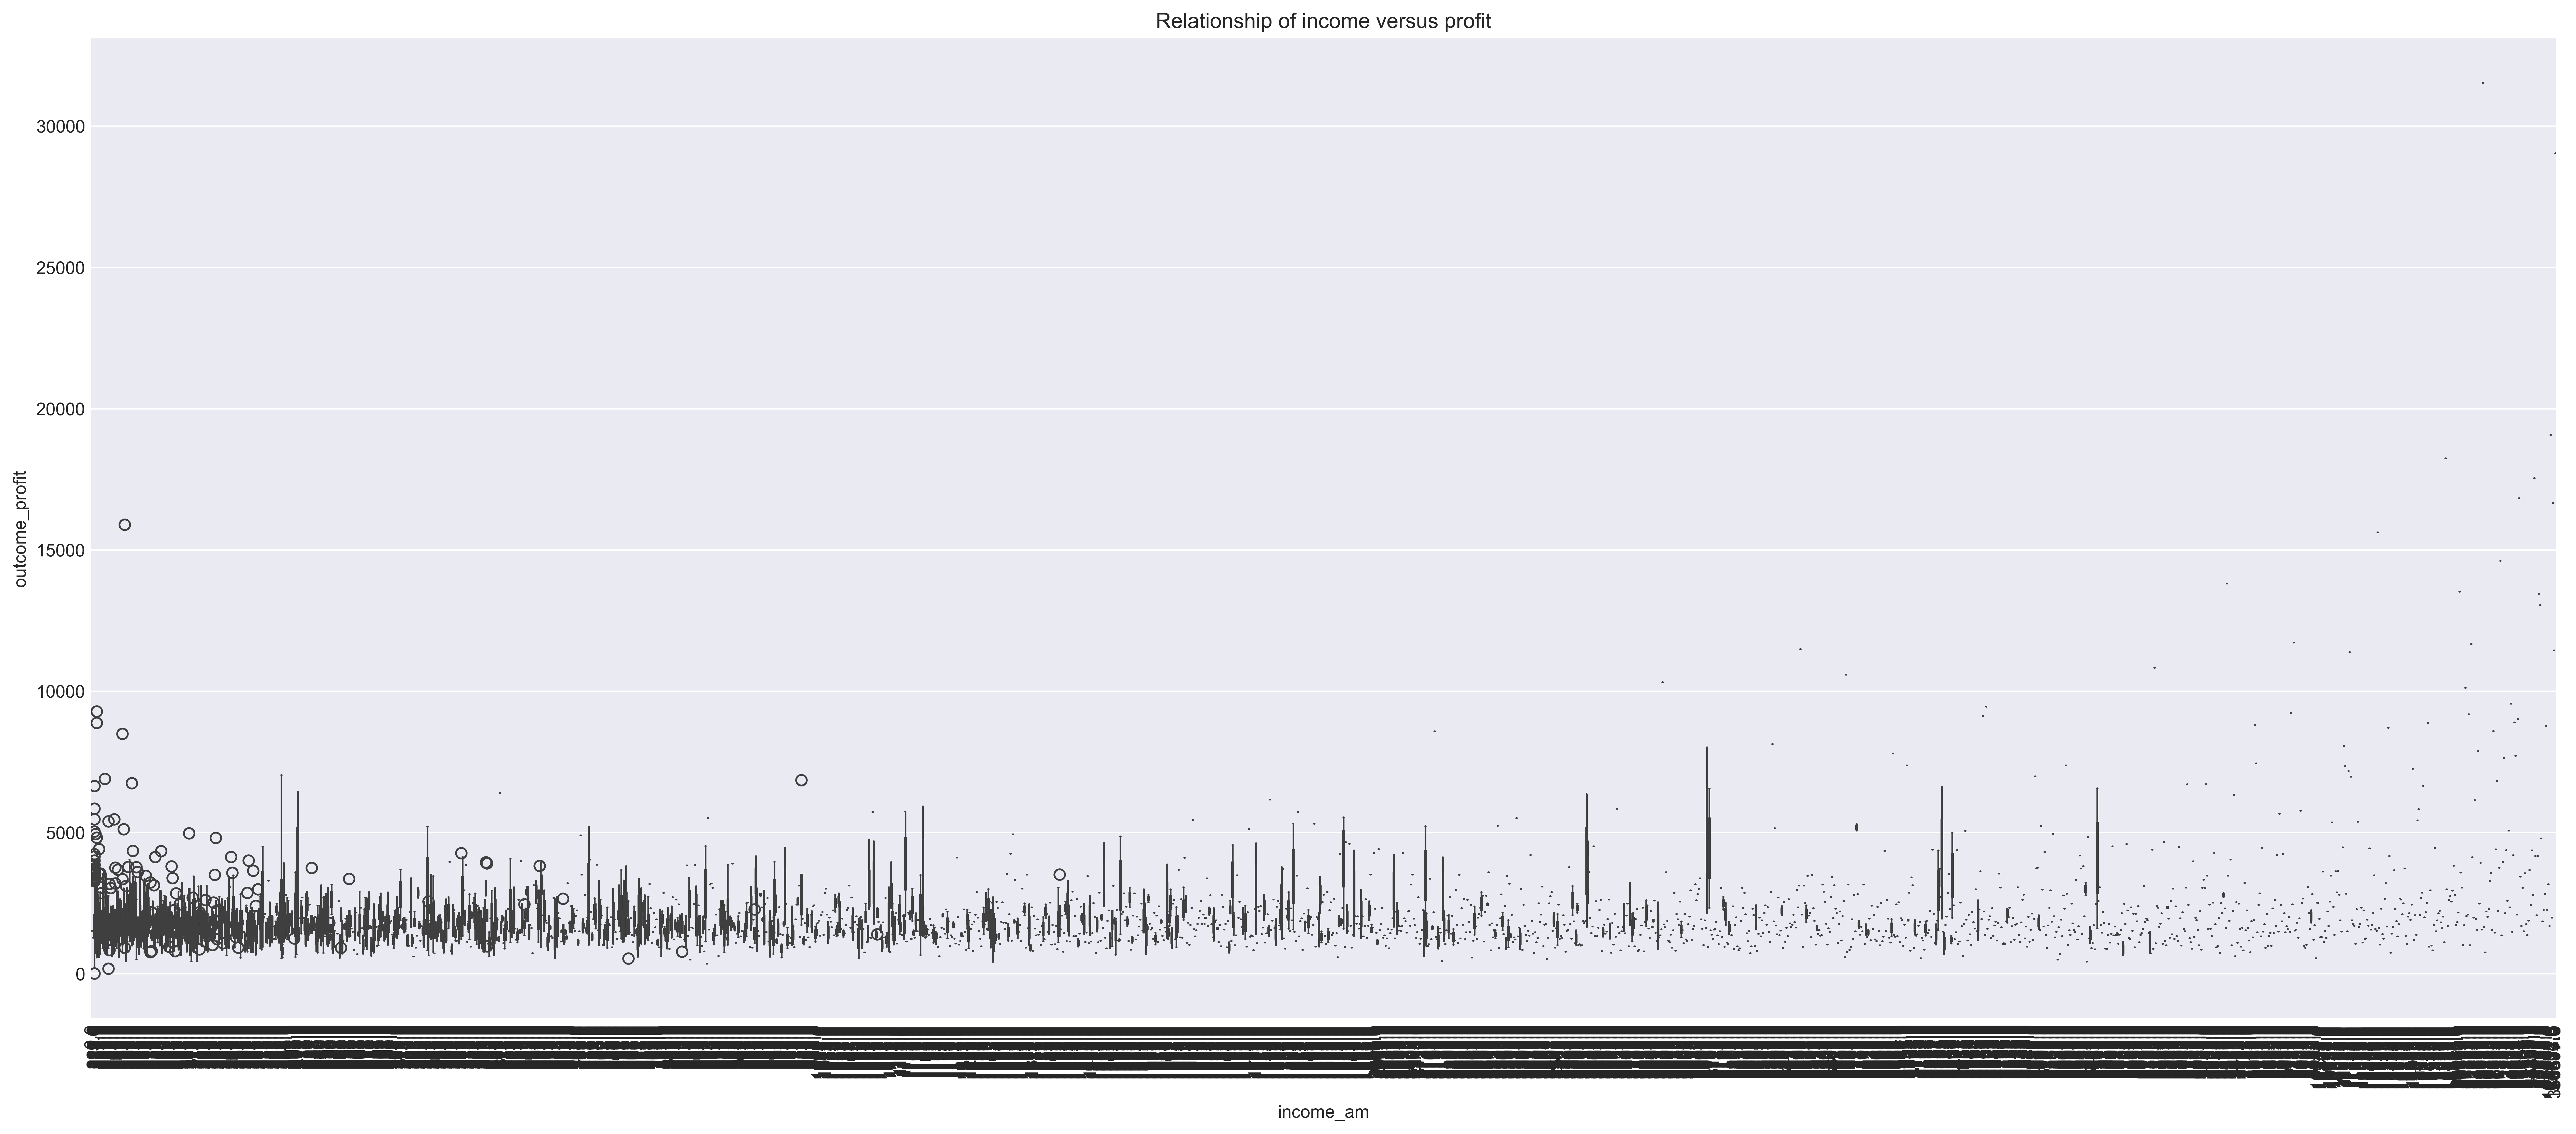

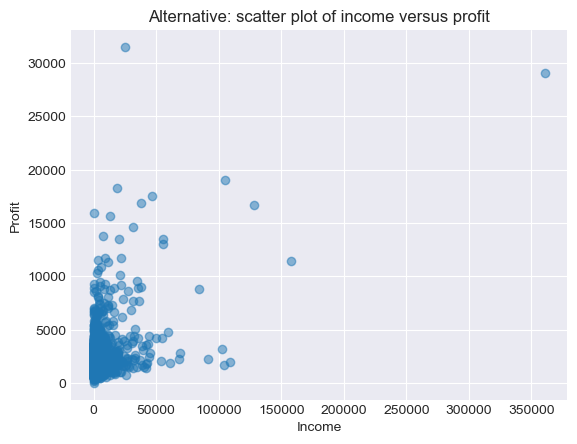

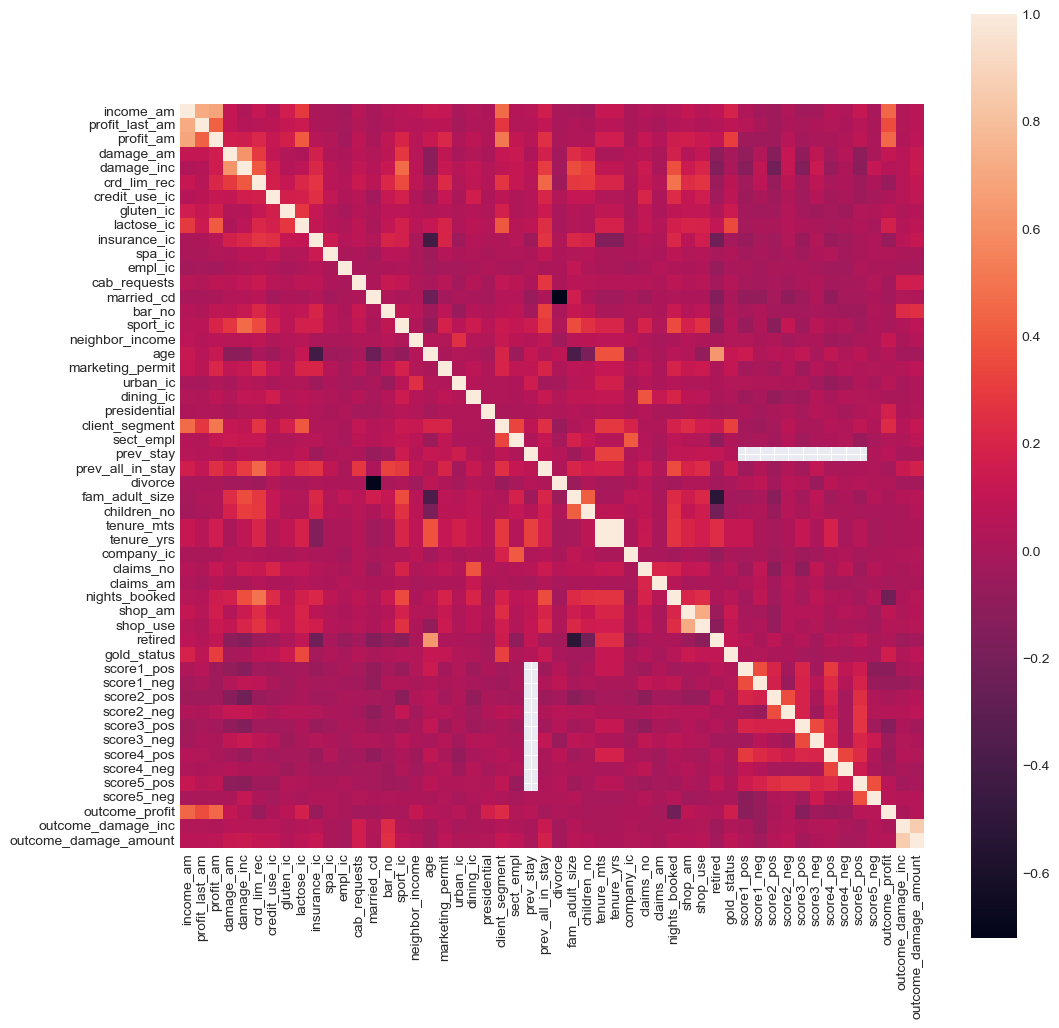

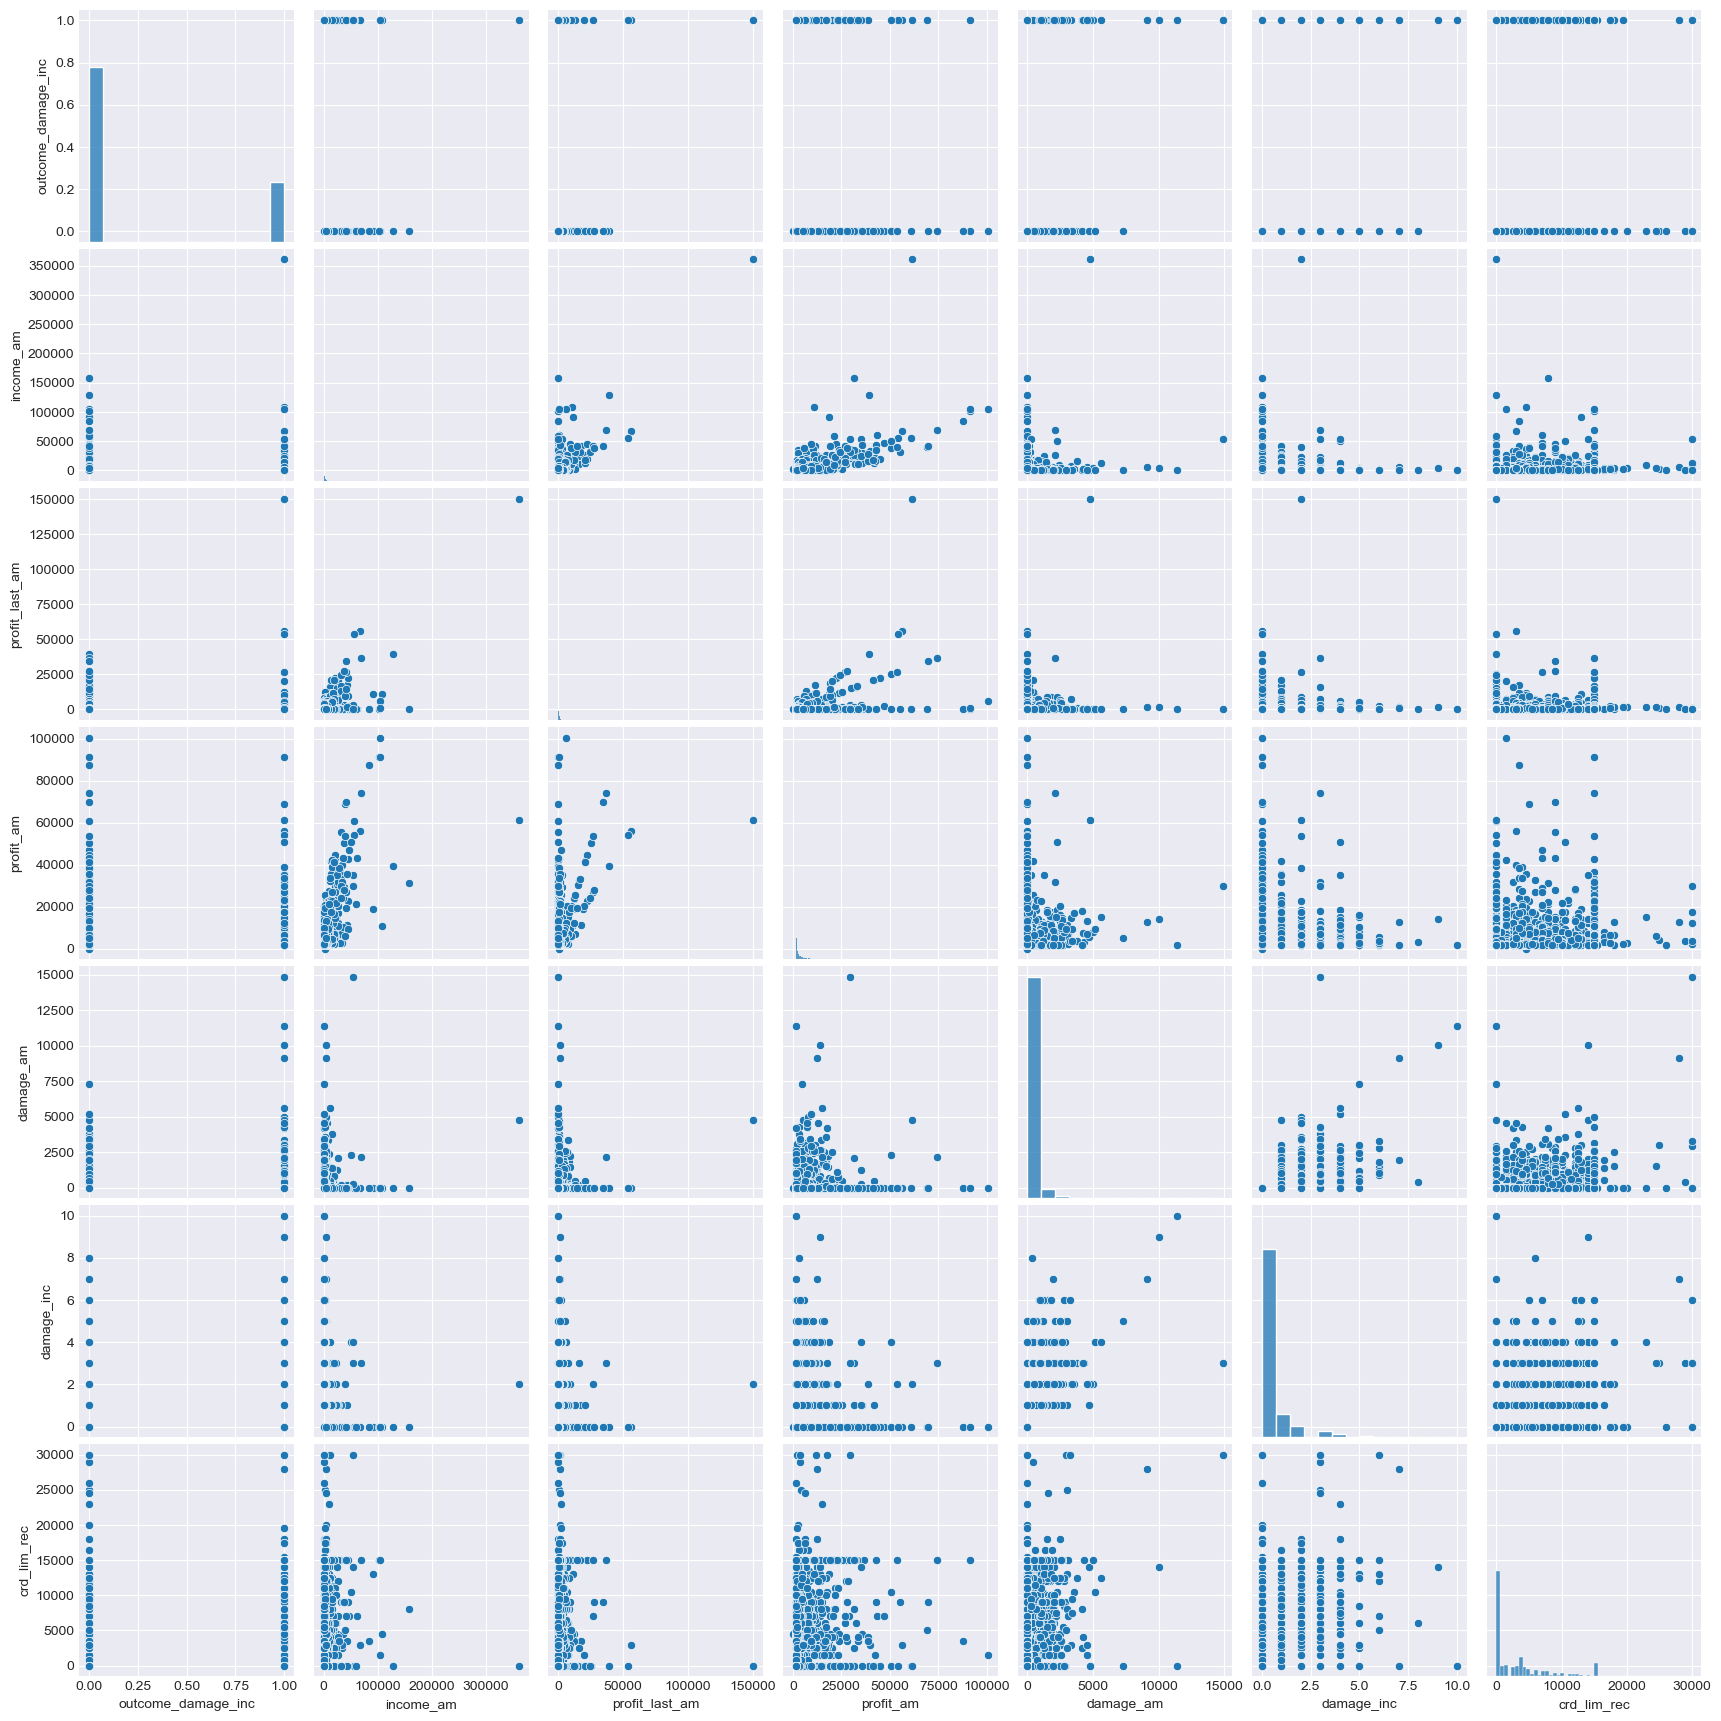

In [11]:
# Boxplot-type for year built vs SalePrice
plt.figure(figsize=(25, 10), dpi=500)  # Bumping up image size and DPI for better viewing
sns.boxplot(x='income_am', y='outcome_profit', data=train_V2);
#plt.ylim((0, 800000));  # Setting a maximum, you have some serious outliers, they make plot less nice!
plt.xticks(rotation=90);  # To rotate x-axis labels
plt.title('Relationship of income versus profit');
plt.show()  # remember: necessary to do this when trying to plot multiple plots from a single cell!

# But I guess a scatter plot would've done well also
plt.scatter(x=train_V2['income_am'], y=train_V2['outcome_profit'], alpha=0.5);  # alpha=0.5 makes it a bit see through
plt.xlabel('Income');
plt.ylabel('Profit');
plt.title('Alternative: scatter plot of income versus profit');
plt.show() 

# Correlation matrix between features
corrmat = train_V2.corr(numeric_only=True)  # Since Pandas 2.0 you need to supply this attribute
plt.figure(figsize=(12, 12));
sns.heatmap(corrmat, vmax=1, square=True);

# Scatterplot matrix (might take a while)
plot_cols = ['outcome_damage_inc', 'income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec']
sns.pairplot(train_V2[plot_cols], height=2.5);

In [12]:
# Getting an idea about total missing values
total_missings = train_V2.isnull().sum().sort_values(ascending=False)  # total missng values, sorted
total_missings.head(20)  # Show top 20 most missing features

# Getting an idea about percentage missing values
pct_missings = train_V2.isnull().mean().sort_values(ascending=False)  # average (%) missng values, sorted
pct_missings.name = 'pct_missing'
pct_missings.head(20)  # Show top 20 most missing features

# Checking frequency table of a feature (xxx)
#train_V2['xxx'].value_counts()

score2_pos         0.7582
score4_pos         0.7554
score1_pos         0.7550
score5_pos         0.7536
score3_pos         0.7478
score2_neg         0.7392
score1_neg         0.7372
score4_neg         0.7352
score3_neg         0.7266
score5_neg         0.7014
tenure_yrs         0.0784
tenure_mts         0.0784
neighbor_income    0.0478
shop_use           0.0176
presidential       0.0176
cab_requests       0.0176
dining_ic          0.0176
company_ic         0.0106
claims_no          0.0106
income_am          0.0106
Name: pct_missing, dtype: float64

I do not like this kind of dropping columns with missing features based on a percentage. The fact that a feature is missing could also have a meaning (a non registered zero measurement for example). This now correlates with the score attributes which are just unclear what they mean. This could be a reaseon to drop the score attributes, but maybe also worth investigating how much overlap there is between the score columns (the percentages suggest there is at least going to be some overlap).

In [13]:
print(f"Shape of train_V2 BEFORE dropping missing features: {train_V2.shape}")
missing_a_lot = pct_missings[pct_missings > 0.15].index  # we take from all variables those missing most, and take the row-idx
print(f"Columns missing more than 15% :{missing_a_lot}")
#train_V2 = train_V2.drop(missing_a_lot, axis=1)
#print(f"Shape of train_V2 AFTER dropping missing features: {train_V2.shape}")

Shape of train_V2 BEFORE dropping missing features: (5000, 53)
Columns missing more than 15% :Index(['score2_pos', 'score4_pos', 'score1_pos', 'score5_pos', 'score3_pos',
       'score2_neg', 'score1_neg', 'score4_neg', 'score3_neg', 'score5_neg'],
      dtype='object')


Investigate the number of unique values per attribute and the unique values themselves. The goal is to investigate which features should be treated as categorical. A first step is identifying which features unique values are not numeric. In the second step we will investigate which of the numerice attributes could potentially be a boolean.

In [14]:
train_nunique = train_V2.nunique()

train_unique = train_nunique.to_frame('unique_count')

train_unique['unique_values'] = train_V2.apply(lambda col: col.unique())

# List datatypes of the unique values

train_unique['datatype'] = train_V2.apply(lambda col: col.dtypes)

# merge previous missings percentages dataseries with the uinque values dataframe

train_unique_missings = train_unique.merge(pct_missings, left_index=True, right_index=True)

# Sort descending by unique values

train_unique_missings.sort_values(by='unique_count', ascending = False, inplace = True)

# Select columns that have the 'object' datatype and investigate underlying datatype

train_unique_dtypeobject = train_unique_missings[train_unique_missings['datatype']=='object']

train_unique_dtypeobject['categorical'] = 1

for i, row in train_unique_dtypeobject.iterrows():
    valuelist = row['unique_values']
    for value in valuelist:
        if type(value) == str:
            continue
        elif np.isnan(value):
            continue
        else:
            train_unique_dtypeobject.loc[i, 'categorical'] = 0
            
train_unique_no_cat = train_unique_missings.drop(train_unique_dtypeobject[train_unique_dtypeobject['categorical']== 1].index)

C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\3450462587.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_unique_dtypeobject['categorical'] = 1


In [15]:
print('Number of object dtype columns that only have str values and are likely categorical:' + str(train_unique_dtypeobject[train_unique_dtypeobject['categorical']== 1].count()))
train_unique_dtypeobject[train_unique_dtypeobject['categorical']== 1]

Number of object dtype columns that only have str values and are likely categorical:unique_count     1
unique_values    1
datatype         1
pct_missing      1
categorical      1
dtype: int64


,unique_count,unique_values,datatype,pct_missing,categorical
gender,2,"[M, V, nan]",object,0.0106,1


In [16]:
print('Number of object dtype columns that have other than str values and need further investigation to determine if they are categorical:' + str(train_unique_dtypeobject[train_unique_dtypeobject['categorical']== 0].count()))
train_unique_dtypeobject[train_unique_dtypeobject['categorical'] == 0]

Number of object dtype columns that have other than str values and need further investigation to determine if they are categorical:unique_count     0
unique_values    0
datatype         0
pct_missing      0
categorical      0
dtype: int64


,unique_count,unique_values,datatype,pct_missing,categorical


In [18]:
# Select columns that are booleans

train_unique_dtypebool = train_unique_no_cat[train_unique_missings['datatype']=='bool']

train_unique_no_bool = train_unique_no_cat.drop(train_unique_dtypebool.index)

print('Number of bool dtype and thus are categorical:' + str(train_unique_dtypebool.count()))
train_unique_dtypebool

Number of bool dtype and thus are categorical:unique_count     1
unique_values    1
datatype         1
pct_missing      1
dtype: int64


C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\3832757247.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_unique_dtypebool = train_unique_no_cat[train_unique_missings['datatype']=='bool']


,unique_count,unique_values,datatype,pct_missing
married_cd,2,"[True, False]",bool,0.0


In [19]:
# select boolean potentials

train_unique_potbool = train_unique_no_bool[train_unique_no_cat['unique_count']==2]

print('Potential boolean 1/0 columns:' + str(train_unique_potbool['unique_count'].count() + train_unique_dtypebool['unique_values'].count()))


Potential boolean 1/0 columns:20


C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\821154156.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_unique_potbool = train_unique_no_bool[train_unique_no_cat['unique_count']==2]


In [20]:
# identify boolean potentials with only 1 / O numeric values

train_unique_potbool['bool'] = 1

for i, row in train_unique_potbool.iterrows():
    valuelist = row['unique_values']
    for value in valuelist:
        if value == 0.0:
            continue
        elif value == 1.0:
            continue
        elif np.isnan(value):
            continue
        else:
            train_unique_potbool.loc[i, 'bool'] = 0
            
train_unique_no_potbool = train_unique_no_bool.drop(train_unique_potbool[train_unique_potbool['bool']== 1].index)

C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\3371859100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_unique_potbool['bool'] = 1


In [23]:
print('Number of columns that only have 1 / 0 values as its unique values:' + str(train_unique_potbool[train_unique_potbool['bool']== 1].count()))
train_unique_potbool[train_unique_potbool['bool']== 1]

Number of columns that only have 1 / 0 values as its unique values:unique_count     19
unique_values    19
datatype         19
pct_missing      19
bool             19
dtype: int64


,unique_count,unique_values,datatype,pct_missing,bool
gluten_ic,2,"[0.0, 1.0, nan]",float64,0.0106,1
lactose_ic,2,"[0.0, 1.0, nan]",float64,0.0106,1
retired,2,"[0.0, 1.0, nan]",float64,0.0106,1
credit_use_ic,2,"[0.0, 1.0, nan]",float64,0.0106,1
outcome_damage_inc,2,"[0, 1]",int64,0.0000,1
gold_status,2,"[0.0, 1.0, nan]",float64,0.0106,1
empl_ic,2,"[0.0, 1.0, nan]",float64,0.0002,1
shop_use,2,"[0.0, 1.0, nan]",float64,0.0176,1
company_ic,2,"[0.0, 1.0, nan]",float64,0.0106,1
insurance_ic,2,"[0.0, 1.0, nan]",float64,0.0106,1


In [24]:
print('Number of columns that where identified as potentially being boolean but not only having 1 / 0 values as its unique values, these need to be assessed whether these are numeric or categorical:' + str(train_unique_potbool[train_unique_potbool['bool']== 0].count()))
train_unique_potbool[train_unique_potbool['bool']== 0]

Number of columns that where identified as potentially being boolean but not only having 1 / 0 values as its unique values, these need to be assesed whether these are numeric or categorical:unique_count     0
unique_values    0
datatype         0
pct_missing      0
bool             0
dtype: int64


,unique_count,unique_values,datatype,pct_missing,bool


Based on the above results and assessment of the feature names in combination with the unique values of the features we assume that all columns with datatypes 'boolean' and 'object', and all columns with only two unique values are categorical columns. These columns can all be expressed as boolean results, although nan are present that also need to be addressed. This leaves us to also evaluate whether there are still non boolean categorical features present in the remaining features. We assume it is more likely that categories are encoded with whole numbers and that the number of categories used will only exceptionally exceed more than two digits. So to aid in identifying potential categorical features we will filter on whole number and sort the resulting list ascending.

In [40]:
# Find non whole values by comparing unique values to their version cast to integer

train_unique_no_potbool['whole'] = 1

for i, row in train_unique_no_potbool.iterrows():
    valuelist = row['unique_values']
    for value in valuelist:
        if value == value.astype(int):
            continue
        elif np.isnan(value):
            continue
        else:
            train_unique_no_potbool.loc[i, 'whole'] = 0

train_unique_whole = train_unique_no_potbool[train_unique_no_potbool['whole']==1]

train_unique_whole.sort_values(by='unique_count', ascending = True, inplace = True)

train_unique_whole

C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid value encountered in cast
  if value == value.astype(int):
C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid value encountered in cast
  if value == value.astype(int):
C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid value encountered in cast
  if value == value.astype(int):
C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid value encountered in cast
  if value == value.astype(int):
C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid value encountered in cast
  if value == value.astype(int):
C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid value encountered in cast
  if value == value.astype(int):
C:\Users\RekenPC\AppData\Local\Temp\ipykernel_16720\523507482.py:8: RuntimeWarning: invalid va

,unique_count,unique_values,datatype,pct_missing,whole
fam_adult_size,4,"[3.0, 1.0, 2.0, nan, 4.0]",float64,0.0106,1
sect_empl,6,"[1.0, 0.0, 4.0, 6.0, nan, 2.0, 3.0]",float64,0.0106,1
client_segment,6,"[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, nan]",float64,0.0106,1
children_no,7,"[2.0, 0.0, 1.0, 3.0, nan, 4.0, 5.0, 6.0]",float64,0.0106,1
claims_no,10,"[0.0, 2.0, 1.0, 3.0, nan, 7.0, 6.0, 4.0, 5.0, ...",float64,0.0106,1
damage_inc,11,"[6.0, 0.0, 2.0, 4.0, 3.0, 1.0, 5.0, nan, 7.0, ...",float64,0.0106,1
cab_requests,17,"[3.0, 7.0, 1.0, 6.0, 4.0, 8.0, nan, 11.0, 10.0...",float64,0.0176,1
crd_lim_rec,41,"[15000.0, 750.0, 0.0, 14000.0, 12000.0, 3500.0...",float64,0.0106,1
bar_no,47,"[2.0, 3.0, 4.0, 8.0, 6.0, 18.0, 9.0, 11.0, 5.0...",float64,0.0106,1
tenure_yrs,58,"[40.0, 2.0, 8.0, nan, 30.0, 29.0, 27.0, 0.0, 1...",float64,0.0784,1


Sect_empl, client_segment can also be identified als likely categorical values.

In [45]:
train_unique_cat_nonbool = train_unique_whole.loc[['sect_empl','client_segment'],:]

In [41]:
train_unique_not_whole = train_unique_no_potbool.drop(train_unique_whole.index)

train_unique_not_whole.sort_values(by='unique_count', ascending = True, inplace = True)

train_unique_not_whole

,unique_count,unique_values,datatype,pct_missing,whole
shop_am,723,"[0.0, 1454.2106266736826, 3667.808726446357, 1...",float64,0.0106,0
score2_pos,1209,"[nan, 0.2323748565109472, 0.5957434445890715, ...",float64,0.7582,0
score4_pos,1223,"[0.8381471071753719, nan, 0.4904860478691031, ...",float64,0.7554,0
score1_pos,1225,"[0.4677681895937277, nan, 0.5669064700512313, ...",float64,0.7550,0
score5_pos,1232,"[nan, 0.1019548979044747, 0.5834235505559962, ...",float64,0.7536,0
score3_pos,1261,"[nan, 0.3305032292193999, 0.4210636166946807, ...",float64,0.7478,0
outcome_damage_amount,1268,"[0.0, 829.66, 888.09, 981.64, 483.05, 1046.7, ...",float64,0.0000,0
score2_neg,1304,"[nan, 0.099528773617558, 0.9017025974768614, 0...",float64,0.7392,0
score1_neg,1314,"[0.9833398100939352, nan, 0.8463201114717805, ...",float64,0.7372,0
score4_neg,1324,"[0.0822880001580627, nan, 0.5424453606796794, ...",float64,0.7352,0


Create extra categorical feature from score information about which hotels the guest previously stayed at, other feature engineering?